In [1]:
#Load Google Drive into colab

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
# Load Packages #

import os
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# os.chdir("/content/drive/MyDrive/AirBnB Data")

data = pd.read_csv("./Combined Listing Data [Summary].csv")

C:\Users\HIMANSHUU\AppData\Local\Temp\ipykernel_18444\3590995765.py:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("./Combined Listing Data [Summary].csv")


In [3]:
data.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Scrape File
0,0,3861476,venicelocalliving.com 341,16577861,John,NaN,Venice,33.998202,-118.476196,Entire home/apt,145,1,4,2015-05-08,0.4,10,304.0,los_angeles_2015_05_listings.csv
1,1,6431889,Turquoise Jewel at Venice Beach,18993265,Greg,NaN,Venice,33.985100,-118.469738,Entire home/apt,175,1,0,NaN,NaN,1,76.0,los_angeles_2015_05_listings.csv
2,2,5754633,Terrane Resort - Oceanfront Suite,15241342,Monica,NaN,Rancho Palos Verdes,33.740152,-118.395754,Private room,295,2,0,NaN,NaN,2,310.0,los_angeles_2015_05_listings.csv
3,3,6302541,Hollywood Hot Spot,32776680,Alix,NaN,Hollywood,34.099955,-118.311584,Private room,110,1,0,NaN,NaN,1,362.0,los_angeles_2015_05_listings.csv
4,4,4469657,Main Street Retreat,10658835,Brandon,NaN,Venice,33.997269,-118.478744,Entire home/apt,600,7,0,NaN,NaN,11,328.0,los_angeles_2015_05_listings.csv


In [4]:
data['month'] = data['Scrape File'].str.replace("los_angeles_", "", regex = False).str.replace("_listings.csv", "", regex = False)

In [5]:
data.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Scrape File,month
0,0,3861476,venicelocalliving.com 341,16577861,John,NaN,Venice,33.998202,-118.476196,Entire home/apt,145,1,4,2015-05-08,0.4,10,304.0,los_angeles_2015_05_listings.csv,2015_05
1,1,6431889,Turquoise Jewel at Venice Beach,18993265,Greg,NaN,Venice,33.985100,-118.469738,Entire home/apt,175,1,0,NaN,NaN,1,76.0,los_angeles_2015_05_listings.csv,2015_05
2,2,5754633,Terrane Resort - Oceanfront Suite,15241342,Monica,NaN,Rancho Palos Verdes,33.740152,-118.395754,Private room,295,2,0,NaN,NaN,2,310.0,los_angeles_2015_05_listings.csv,2015_05
3,3,6302541,Hollywood Hot Spot,32776680,Alix,NaN,Hollywood,34.099955,-118.311584,Private room,110,1,0,NaN,NaN,1,362.0,los_angeles_2015_05_listings.csv,2015_05
4,4,4469657,Main Street Retreat,10658835,Brandon,NaN,Venice,33.997269,-118.478744,Entire home/apt,600,7,0,NaN,NaN,11,328.0,los_angeles_2015_05_listings.csv,2015_05


In [6]:
df = data.copy()

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the string column to datetime format
df['month'] = pd.to_datetime(df['month'], format='%Y_%m')

df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Scrape File,month
0,0,3861476,venicelocalliving.com 341,16577861,John,NaN,Venice,33.998202,-118.476196,Entire home/apt,145,1,4,2015-05-08,0.4,10,304.0,los_angeles_2015_05_listings.csv,2015-05-01
1,1,6431889,Turquoise Jewel at Venice Beach,18993265,Greg,NaN,Venice,33.985100,-118.469738,Entire home/apt,175,1,0,NaN,NaN,1,76.0,los_angeles_2015_05_listings.csv,2015-05-01
2,2,5754633,Terrane Resort - Oceanfront Suite,15241342,Monica,NaN,Rancho Palos Verdes,33.740152,-118.395754,Private room,295,2,0,NaN,NaN,2,310.0,los_angeles_2015_05_listings.csv,2015-05-01
3,3,6302541,Hollywood Hot Spot,32776680,Alix,NaN,Hollywood,34.099955,-118.311584,Private room,110,1,0,NaN,NaN,1,362.0,los_angeles_2015_05_listings.csv,2015-05-01
4,4,4469657,Main Street Retreat,10658835,Brandon,NaN,Venice,33.997269,-118.478744,Entire home/apt,600,7,0,NaN,NaN,11,328.0,los_angeles_2015_05_listings.csv,2015-05-01


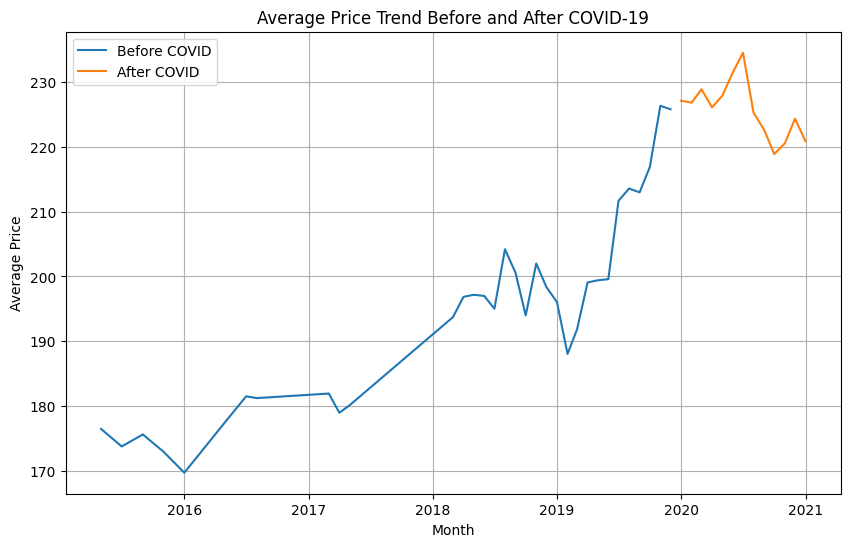

In [8]:
# Set the cutoff date for the beginning of the COVID-19 impact
covid_start_date = pd.to_datetime('2020-01-01')

# Separate data before and after COVID
before_covid = df[df['month'] < covid_start_date]
after_covid = df[df['month'] >= covid_start_date]

# Calculate average prices for each period
avg_price_before_covid = before_covid.groupby('month')['price'].mean()
avg_price_after_covid = after_covid.groupby('month')['price'].mean()

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(avg_price_before_covid.index, avg_price_before_covid, label='Before COVID')
plt.plot(avg_price_after_covid.index, avg_price_after_covid, label='After COVID')

plt.title('Average Price Trend Before and After COVID-19')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()


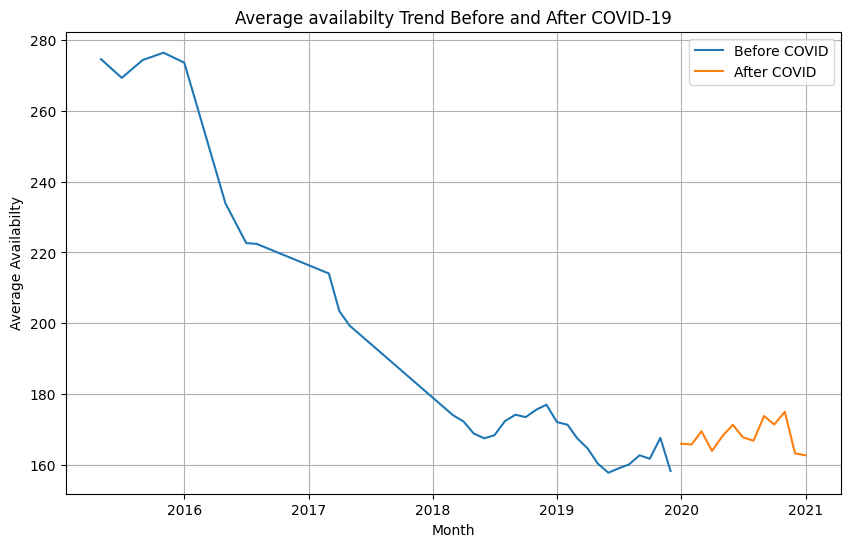

In [32]:
# availabilty

# Calculate average availability for each period
avg_availability_before_covid = before_covid.groupby('month')['availability_365'].mean()
avg_pavailability_after_covid = after_covid.groupby('month')['availability_365'].mean()

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(avg_availability_before_covid.index, avg_availability_before_covid, label='Before COVID')
plt.plot(avg_pavailability_after_covid.index, avg_pavailability_after_covid, label='After COVID')

plt.title('Average availabilty Trend Before and After COVID-19')
plt.xlabel('Month')
plt.ylabel('Average Availabilty')
plt.legend()
plt.grid(True)
plt.show()

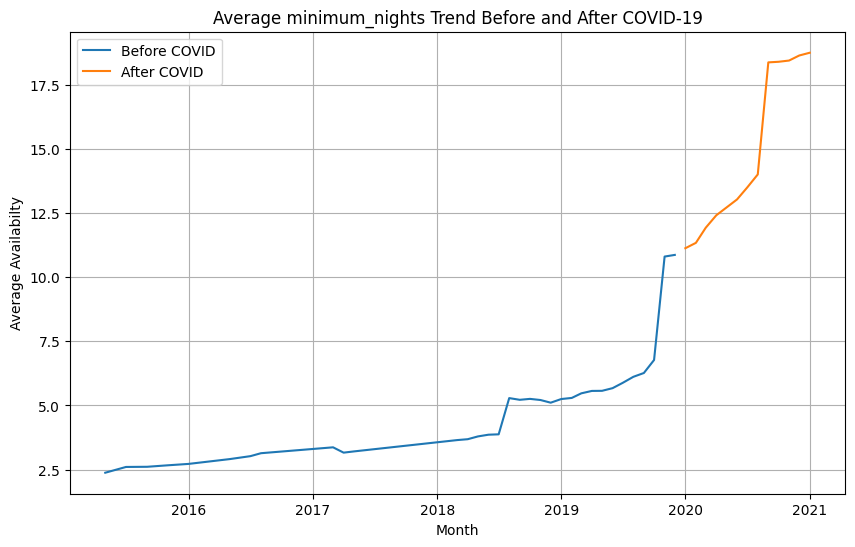

In [33]:
# minimum_nights

# Calculate average availability for each period
avg_minimum_nights_before_covid = before_covid.groupby('month')['minimum_nights'].mean()
avg_minimum_nights_after_covid = after_covid.groupby('month')['minimum_nights'].mean()

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(avg_minimum_nights_before_covid.index, avg_minimum_nights_before_covid, label='Before COVID')
plt.plot(avg_minimum_nights_after_covid.index, avg_minimum_nights_after_covid, label='After COVID')

plt.title('Average minimum_nights Trend Before and After COVID-19')
plt.xlabel('Month')
plt.ylabel('Average Availabilty')
plt.legend()
plt.grid(True)
plt.show()

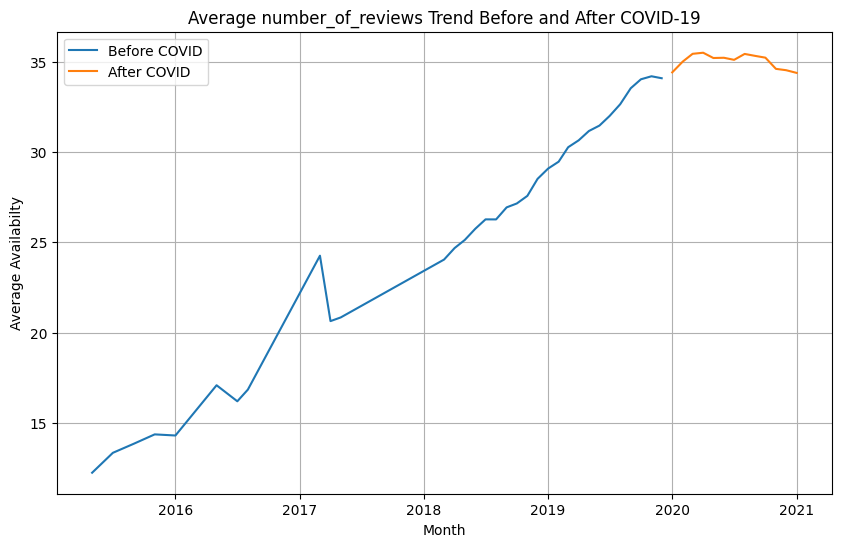

In [34]:
# number_of_reviews

# Calculate average availability for each period
avg_number_of_reviews_before_covid = before_covid.groupby('month')['number_of_reviews'].mean()
avg_number_of_reviews_after_covid = after_covid.groupby('month')['number_of_reviews'].mean()

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(avg_number_of_reviews_before_covid.index, avg_number_of_reviews_before_covid, label='Before COVID')
plt.plot(avg_number_of_reviews_after_covid.index, avg_number_of_reviews_after_covid, label='After COVID')

plt.title('Average number_of_reviews Trend Before and After COVID-19')
plt.xlabel('Month')
plt.ylabel('Average Availabilty')
plt.legend()
plt.grid(True)
plt.show()

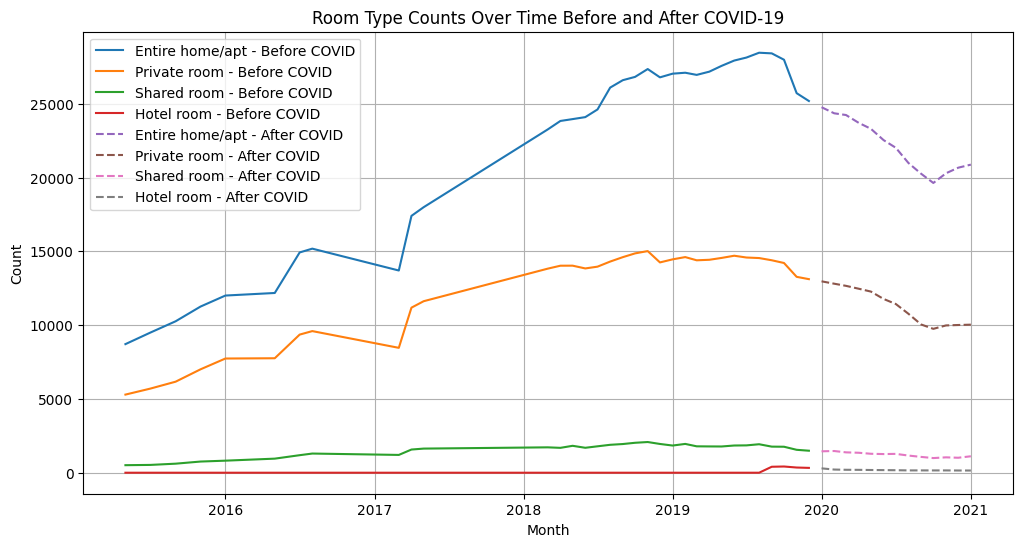

In [40]:
# Group by 'month' and 'room_type' and calculate counts
room_type_counts_before = before_covid.groupby(['month', 'room_type']).size().unstack().fillna(0)
room_type_counts_after = after_covid.groupby(['month', 'room_type']).size().unstack().fillna(0)

# Plotting
plt.figure(figsize=(12, 6))

room_types = df['room_type'].unique()

for room_type in room_types:
    plt.plot(room_type_counts_before.index, room_type_counts_before[room_type], label=f'{room_type} - Before COVID')

for room_type in room_types:
    plt.plot(room_type_counts_after.index, room_type_counts_after[room_type], label=f'{room_type} - After COVID', linestyle='dashed')

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Room Type Counts Over Time Before and After COVID-19')
plt.legend()
plt.grid(True)
plt.show()

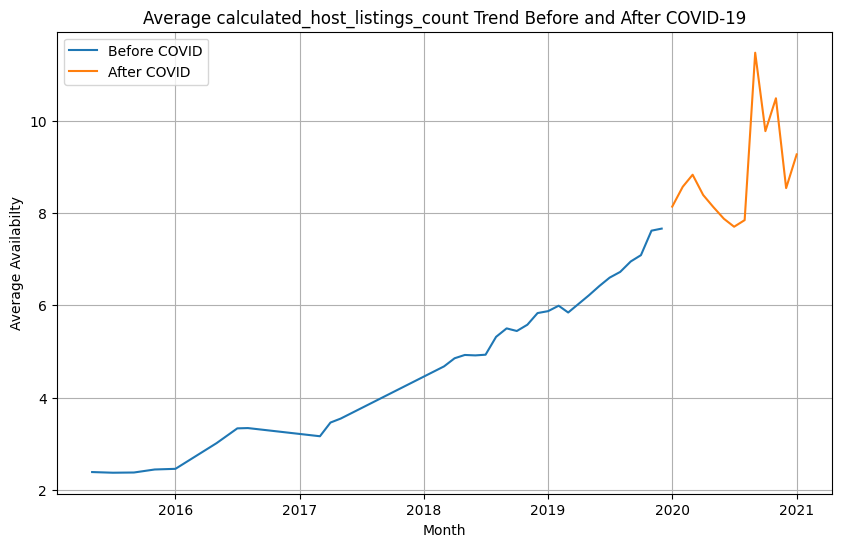

In [41]:
##### calculated_host_listings_count

# calculated_host_listings_count

# Calculate average availability for each period
avg_calculated_host_listings_count_before_covid = before_covid.groupby('month')['calculated_host_listings_count'].mean()
avg_calculated_host_listings_count_after_covid = after_covid.groupby('month')['calculated_host_listings_count'].mean()

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(avg_calculated_host_listings_count_before_covid.index, avg_calculated_host_listings_count_before_covid, label='Before COVID')
plt.plot(avg_calculated_host_listings_count_after_covid.index, avg_calculated_host_listings_count_after_covid, label='After COVID')

plt.title('Average calculated_host_listings_count Trend Before and After COVID-19')
plt.xlabel('Month')
plt.ylabel('Average Availabilty')
plt.legend()
plt.grid(True)
plt.show()

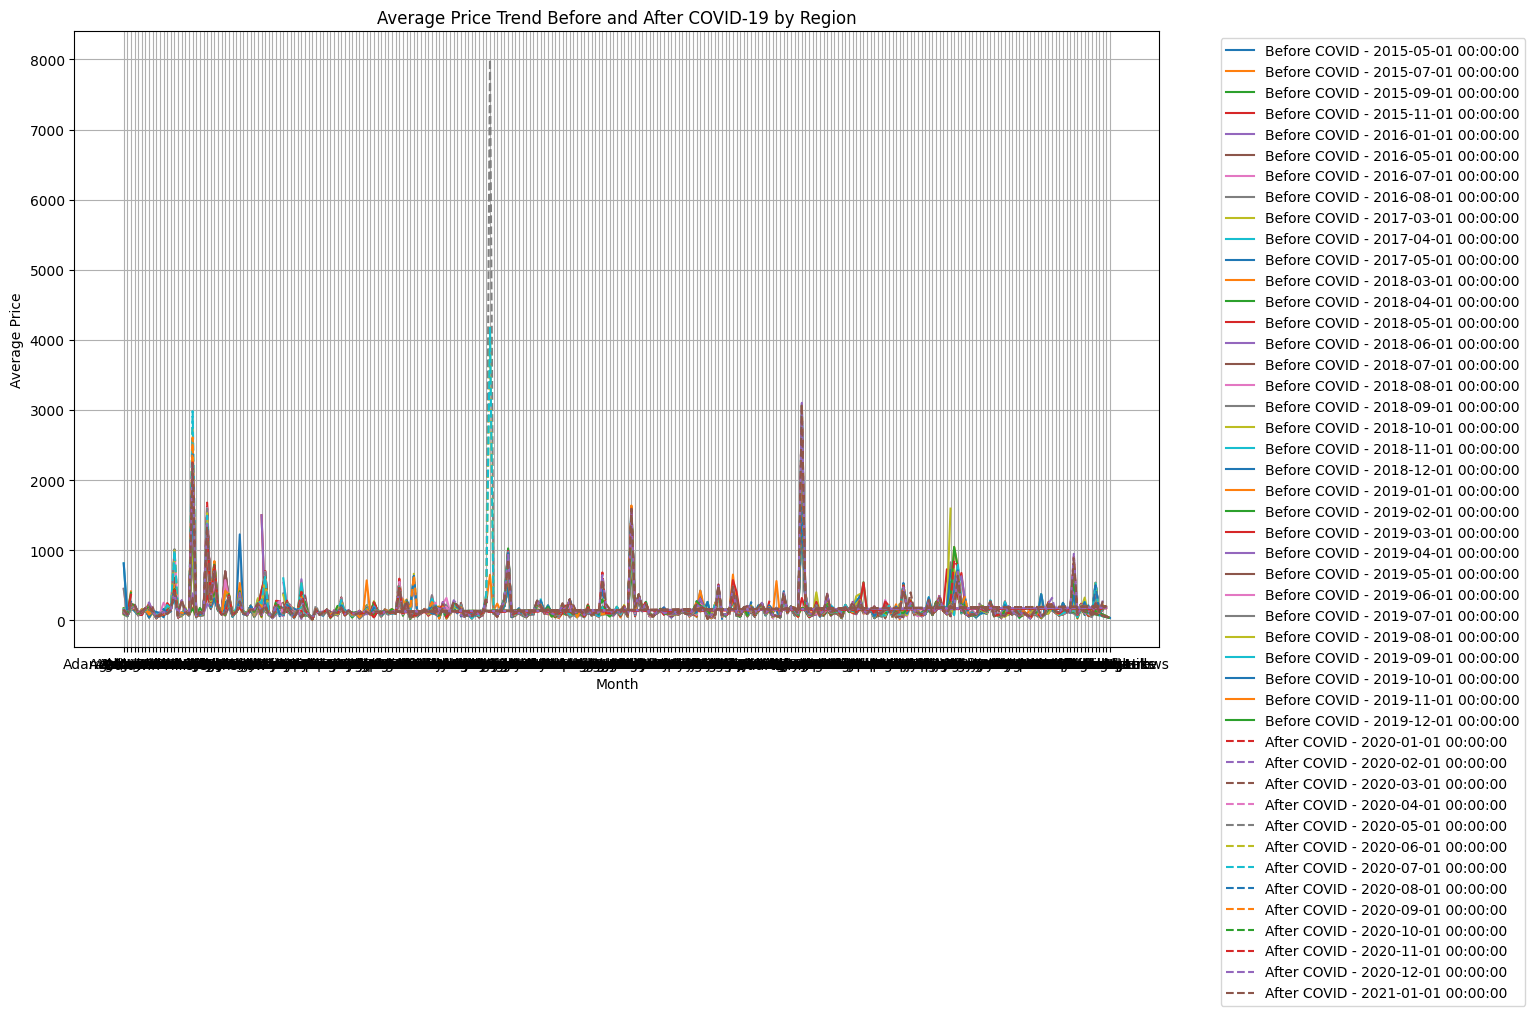

In [15]:
### Price by region before and after covid

# Set the cutoff date for the beginning of the COVID-19 impact
covid_start_date = pd.to_datetime('2020-01-01')

# Separate data before and after COVID
before_covid = df[df['month'] < covid_start_date]
after_covid = df[df['month'] >= covid_start_date]

# Group by region and month, calculate average prices
avg_price_before_covid = before_covid.groupby(['neighbourhood', 'month'])['price'].mean().unstack()
avg_price_after_covid = after_covid.groupby(['neighbourhood', 'month'])['price'].mean().unstack()

# Plotting
plt.figure(figsize=(14, 8))

for region in avg_price_before_covid.columns:
    plt.plot(avg_price_before_covid.index, avg_price_before_covid[region], label=f'Before COVID - {region}')

for region in avg_price_after_covid.columns:
    plt.plot(avg_price_after_covid.index, avg_price_after_covid[region], label=f'After COVID - {region}', linestyle='dashed')

plt.title('Average Price Trend Before and After COVID-19 by Region')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
